# Wine clustering

Data source: https://archive.ics.uci.edu/ml/datasets/wine

See also: https://www.kaggle.com/harrywang/wine-dataset-for-clustering

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are: Alcohol, Malic acid, Ash, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

wine_data = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                          delimiter = ',', dtype = float, skip_header = 0)

ans = wine_data[:, 0]

wine_data = np.delete(wine_data, 0, 1) # Remove first column

C:\Python\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Optimal number of clusters')

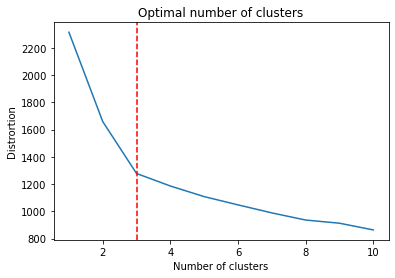

In [2]:
data = StandardScaler().fit_transform(wine_data)

n_clusters = 10
distortions = []
nums = []
for n in range(1, n_clusters + 1):
    kmeans = KMeans(n_clusters = n, random_state = 777)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)
    nums.append(n)

plt.plot(nums, distortions)
plt.axvline(x = 3, color = 'red', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('Distrortion')
plt.title('Optimal number of clusters')

Text(0, 0.5, 'PC2')

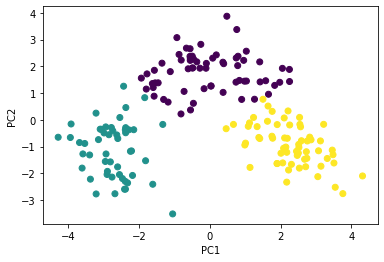

In [3]:
elbow = 3

kmeans = KMeans(n_clusters = elbow)
kmeans.fit(data)

# Visualisation with PCA
pca = PCA(2)
data_cluster = pca.fit_transform(data.copy())

plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c = kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')

# plt.scatter(data[:, 1], data[:, 5], c = kmeans.labels_)
# plt.show()

Text(0, 0.5, 'PC2')

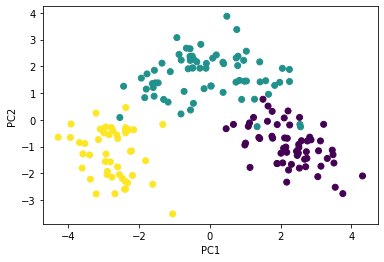

In [4]:
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c = ans)
plt.xlabel('PC1')
plt.ylabel('PC2')